In [1]:
## App Rating Prediction

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [3]:
# Load the data file using pandas. 
df=pd.read_csv("googleplaystore.csv")
pd.set_option('display.max_columns',None)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Check for null values in the data. Get the number of null values for each column.
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
# Drop records with nulls in any of the columns. 
df = df.dropna()

In [6]:
#     Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 
#     Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
#         Extract the numeric value from the column
#         Multiply the value by 1,000, if size is mentioned in Mb


In [7]:
# Filter the DataFrame
df = df[df.Size != 'Varies with device']

In [8]:
#     The function checks the last character of the input string b using b[len(b) - 1:]. 
#     If it is 'M', it assumes the input is in megabytes and proceeds with the conversion.
#     In the first if condition, it takes the numeric part of the input string using b[0: len(b) - 1] 
#     (excluding the last character, which is 'M'). It then converts it to a float and multiplies it by 1000 to 
#     convert megabytes to kilobytes. The result is returned.
#     In the elif condition, the function checks if the last character is either 'K' or 'k', which indicates 
#     that the input is already in kilobytes. It extracts the numeric part of the input string and returns it as a float.
#     If none of the above conditions are satisfied, the function assumes that the input is not in a recognized format 
#     (neither megabytes nor kilobytes), and it simply returns the input as it is.

def MtoK(b):
    if b[len(b) -1: ] == 'M':
        return(float(b[0: len(b) -1 ])*1000)
    elif b[len(b) -1: ] == 'K' or  b[len(b) -1: ] == 'k':
        return(float(b[0: len(b) -1 ]))
    else:
        return b

In [9]:
df['Size'] = df['Size'].apply(MtoK)

In [67]:
for a in df.Size:
    print(a)

19000.0
14000.0
8700.0
2800.0
5600.0
19000.0
29000.0
33000.0
3100.0
28000.0
12000.0
20000.0
21000.0
37000.0
5500.0
17000.0
39000.0
31000.0
14000.0
12000.0
4200.0
23000.0
6000.0
25000.0
6100.0
4600.0
4200.0
9200.0
5200.0
11000.0
11000.0
4200.0
9200.0
24000.0
11000.0
9400.0
15000.0
10000.0
1200.0
12000.0
24000.0
26000.0
8000.0
7900.0
25000.0
56000.0
57000.0
35000.0
33000.0
33000.0
5600.0
54000.0
201.0
3600.0
5700.0
17000.0
8600.0
2400.0
27000.0
2700.0
2500.0
7000.0
35000.0
16000.0
16000.0
17000.0
3400.0
8900.0
3900.0
2900.0
38000.0
32000.0
37000.0
15000.0
5400.0
18000.0
38000.0
1100.0
7900.0
35000.0
17000.0
19000.0
14000.0
2200.0
4500.0
17000.0
14000.0
9800.0
21000.0
52000.0
14000.0
25000.0
9000.0
12000.0
35000.0
6700.0
30000.0
2900.0
17000.0
2900.0
2600.0
4200.0
7100.0
57000.0
22000.0
24000.0
21000.0
3400.0
6400.0
3200.0
8200.0
2900.0
23000.0
4600.0
3100.0
4900.0
9500.0
4200.0
5400.0
2800.0
5000.0
5900.0
13000.0
7100.0
6700.0
17000.0
19000.0
6700.0
21000.0
37000.0
15000.0
23000.0
19000.

In [11]:
# Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

df['Reviews'].dtypes

dtype('O')

In [12]:
df["Reviews"]=df["Reviews"].astype(int)

In [13]:
df['Reviews'].dtypes

dtype('int32')

In [14]:
# Installs field is currently stored as string and has values like 1,000,000+. 
# Treat 1,000,000+ as 1,000,000
# remove ‘+’, ‘,’ from the field, convert it to integer

df['Installs'] = df['Installs'].str.replace('[+,]', '',regex=True)

In [15]:
df["Installs"]=df["Installs"].astype(int)

In [16]:
df['Installs'].dtypes

dtype('int32')

In [17]:
# Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

df['Price'] = df['Price'].str.replace('[$]', '',regex=True)

In [18]:
df["Price"]=df["Price"].astype(float)

In [19]:
# Average rating should be between 1 and 5 as only these values are allowed 
# on the play store. Drop the rows that have a value outside this range.

df[(df['Rating'] > 5) | (df['Rating'] < 1)]

# or this
# df.query('(Rating > 5) or (Rating < 1)')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [20]:
df.shape

(7723, 13)

In [21]:
# Reviews should not be more than installs as only those who installed can review the app. If there are
# any such records, drop them.


# WAYS

# df[(df['Rating'] > 5) | (df['Rating'] < 1)]
# or this
df.query('Reviews > Installs')
#or this
# df.loc[df.Reviews > df.Installs]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [22]:
# deleting such records

df = df.drop(df.query('Reviews > Installs').index)


In [23]:
df.shape

(7717, 13)

In [24]:
# For free apps (type = “Free”), the price should not be >0. Drop any such rows.

df.query("Type == 'Free' and Price > 0")
# or this
# df[np.logical_and(df['Type'] == 'Free', df['Price'] > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [25]:
# Boxplot for Price

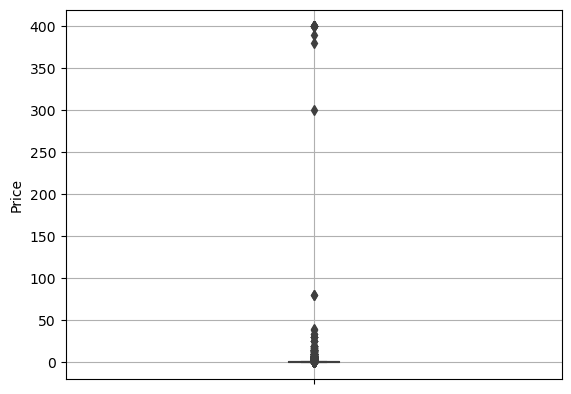

In [26]:
sns.boxplot(y='Price', data=df,width=0.1)
plt.xlabel:('Price')
plt.grid()

In [27]:
df['Price'].describe()

count    7717.000000
mean        1.128725
std        17.414784
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [28]:
# Boxplot for Reviews

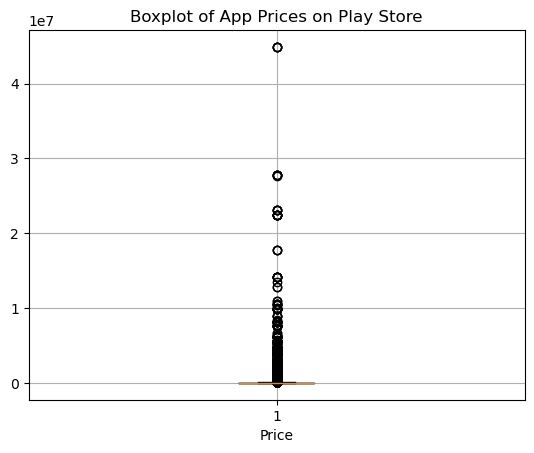

In [29]:
plt.boxplot(df['Reviews'])
plt.title('Boxplot of App Prices on Play Store')
plt.xlabel('Price')
plt.grid()

In [30]:
df['Reviews'].describe()

count    7.717000e+03
mean     2.951275e+05
std      1.864640e+06
min      1.000000e+00
25%      1.090000e+02
50%      2.351000e+03
75%      3.910900e+04
max      4.489389e+07
Name: Reviews, dtype: float64

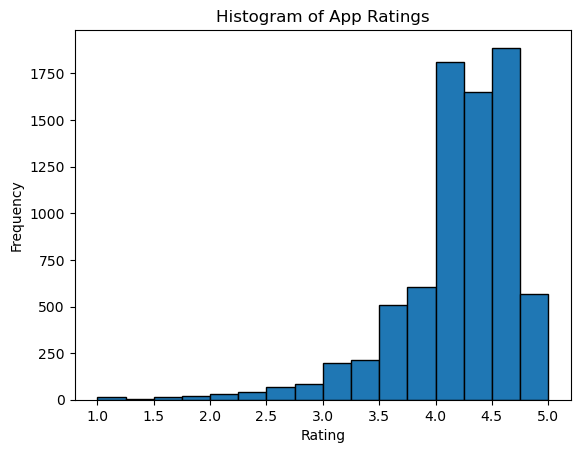

In [31]:
# Histogram for Rating
plt.hist(df['Rating'], bins=16, edgecolor='black')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of App Ratings')

# Show the plot
plt.show()

In [32]:
df['Rating'].describe()

count    7717.000000
mean        4.173293
std         0.544362
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

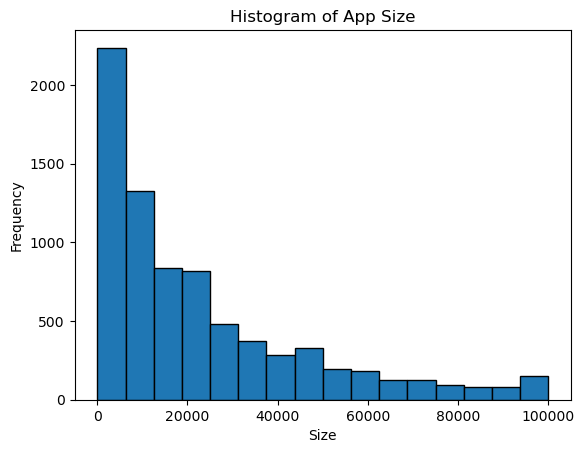

In [33]:
# Histogram for Size

plt.hist(df['Size'], bins=16, edgecolor='black')

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Histogram of App Size')

# Show the plot
plt.show()

In [34]:
df['Size'].describe()

count      7717.000000
mean      22976.614293
std       23456.770600
min           8.500000
25%        5300.000000
50%       14000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [35]:
# Price: From the box plot, it seems like there are some apps with very high price. 
# A price of $200 for an application on the Play Store is very high and suspicious!
# Check out the records with very high price
# Is 200 indeed a high price?
# Drop these as most seem to be junk apps

# df.loc[df.Price > 200]
# or this
df.query('Price > 200')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [36]:
df.shape

(7717, 13)

In [37]:
# delting price more than 200

df.drop((df.query('Price > 200')).index, inplace=True)

# or
# df.drop(df[df['Price'] > 200].index, inplace=True)

In [38]:
df.shape

(7702, 13)

In [39]:
df.query('Reviews > 2000000')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
345,Yahoo Mail – Stay Organized,COMMUNICATION,4.3,4187998,16000.0,100000000,Free,0.0,Everyone,Communication,"July 18, 2018",5.29.3,4.4 and up
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
366,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,4.4,3648120,3300.0,100000000,Free,0.0,Teen,Communication,"July 18, 2018",11.4.0,4.0 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.0,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,Need for Speed™ No Limits,GAME,4.4,3344300,22000.0,50000000,Free,0.0,Everyone 10+,Racing,"July 24, 2018",2.12.1,4.1 and up
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [40]:
# Reviews: Very few apps have very high number of reviews. 
# These are all star apps that don’t help with the analysis and, in fact, will skew it. 
# Drop records having more than 2 million reviews.

In [41]:
df.drop((df.query('Reviews > 2000000')).index, inplace=True)

In [42]:
df.shape

(7483, 13)

In [43]:
# Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
# Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
# Decide a threshold as cutoff for outlier and drop records having values more than that

In [44]:
percentiles = np.percentile(df['Installs'], [10, 25, 50, 70, 90, 95, 99])


print("10th percentile: ", percentiles[0])
print("25th percentile: ", percentiles[1])
print("50th percentile: ", percentiles[2])
print("70th percentile: ", percentiles[3])
print("90th percentile: ", percentiles[4])
print("95th percentile: ", percentiles[5])
print("99th percentile: ", percentiles[6])

10th percentile:  1000.0
25th percentile:  10000.0
50th percentile:  100000.0
70th percentile:  1000000.0
90th percentile:  10000000.0
95th percentile:  10000000.0
99th percentile:  50000000.0


In [45]:
# 95 % as threshold

df.drop((df.query('Installs > 10000000')).index, inplace=True)

In [46]:
df.shape

(7307, 13)

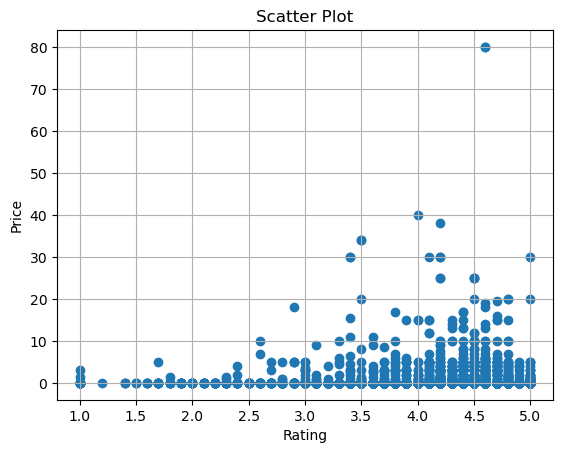

In [47]:
plt.scatter(df['Rating'], df['Price'],)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Scatter Plot')
plt.grid()

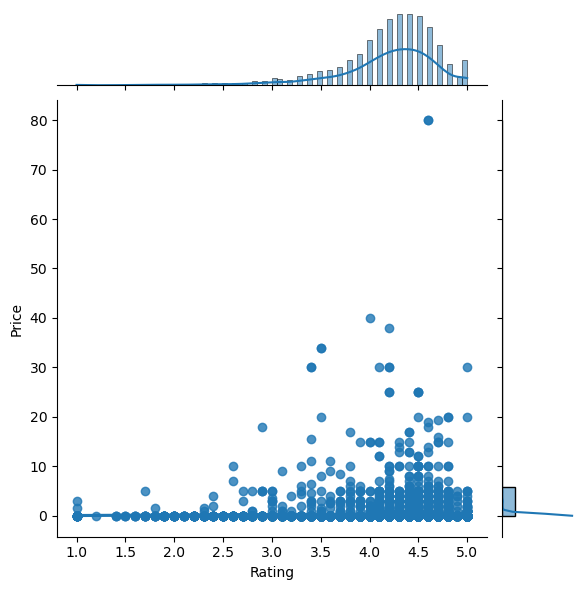

In [48]:
# Create a joint plot
sns.jointplot(x=df['Rating'], y=df['Price'],data=df, kind="reg")

# "scatter" | "kde" | "hist" | "hex" | "reg" | "resid"

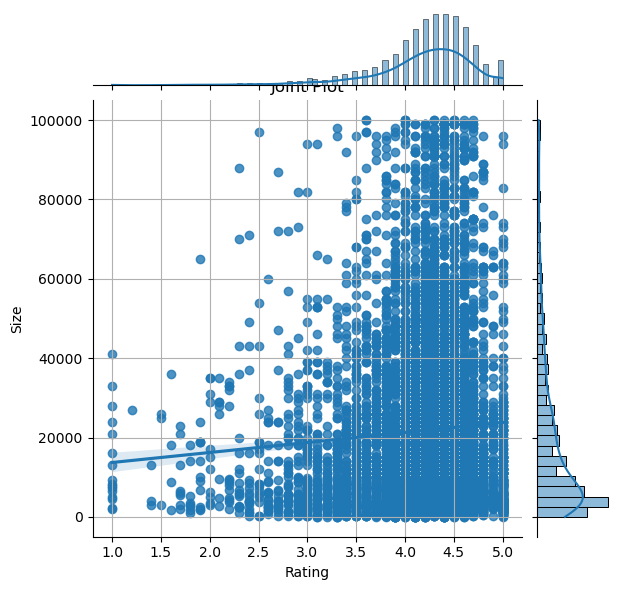

In [49]:
# Create a joint plot
sns.jointplot(x=df['Rating'], y=df['Size'],data=df, kind="reg")
plt.xlabel('Rating')
plt.ylabel('Size')
plt.title('Joint Plot')
plt.grid()
# "scatter" | "kde" | "hist" | "hex" | "reg" | "resid"

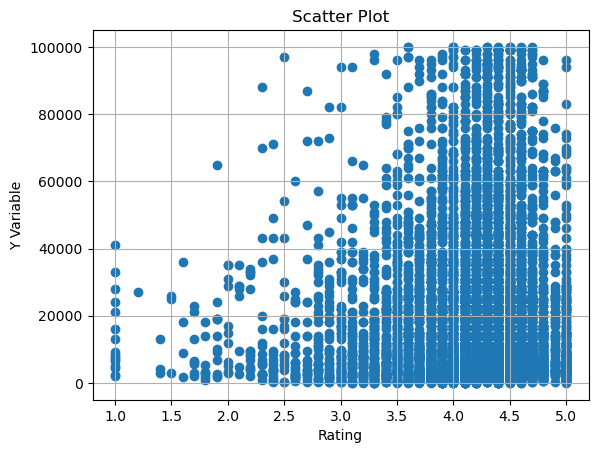

In [50]:
plt.scatter(df['Rating'], df['Size'])
plt.xlabel('Rating')
plt.ylabel('Y Variable')
plt.title('Scatter Plot')
plt.grid()


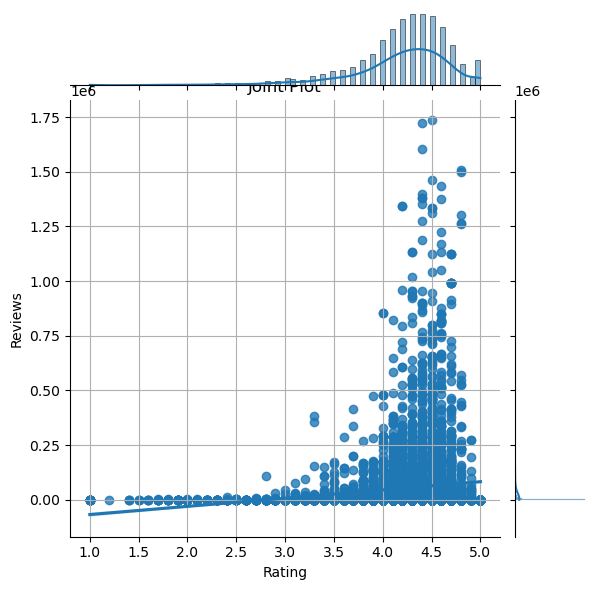

In [51]:
# Create a joint plot
sns.jointplot(x=df['Rating'], y=df['Reviews'],data=df, kind="reg")
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.title('Joint Plot')
plt.grid()

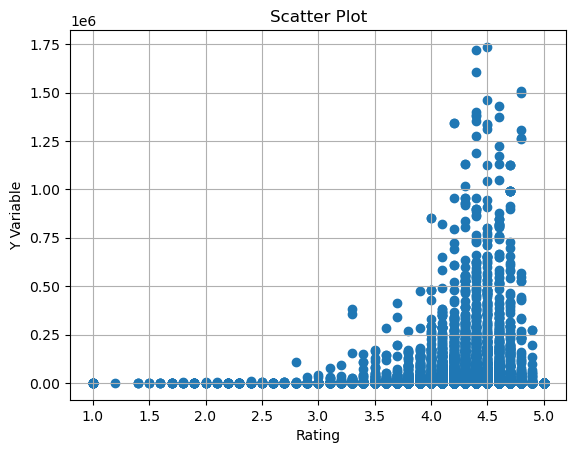

In [52]:
plt.scatter(df['Rating'], df['Reviews'])
plt.xlabel('Rating')
plt.ylabel('Y Variable')
plt.title('Scatter Plot')
plt.grid()


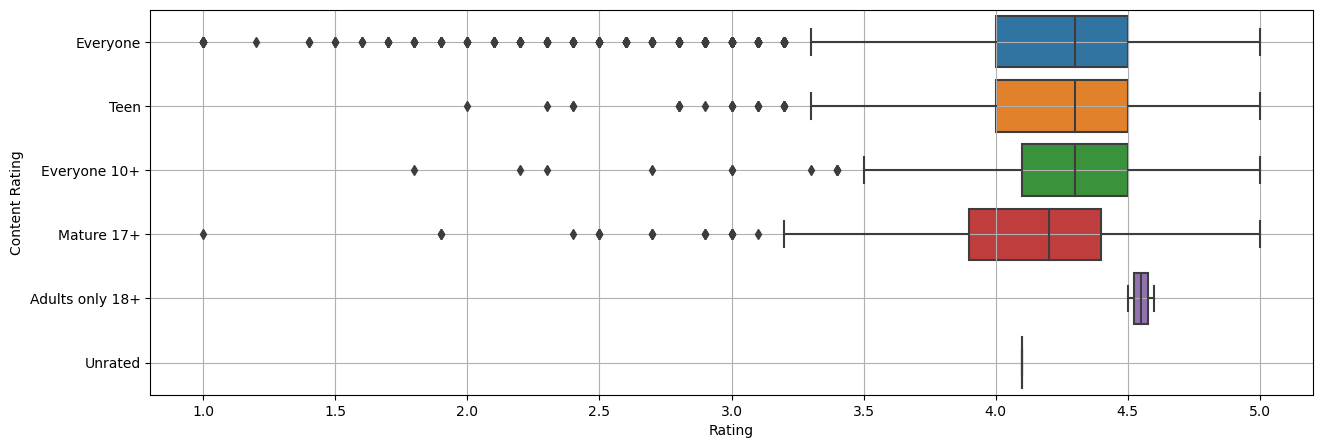

In [53]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Rating", y="Content Rating", data=df)
plt.grid()

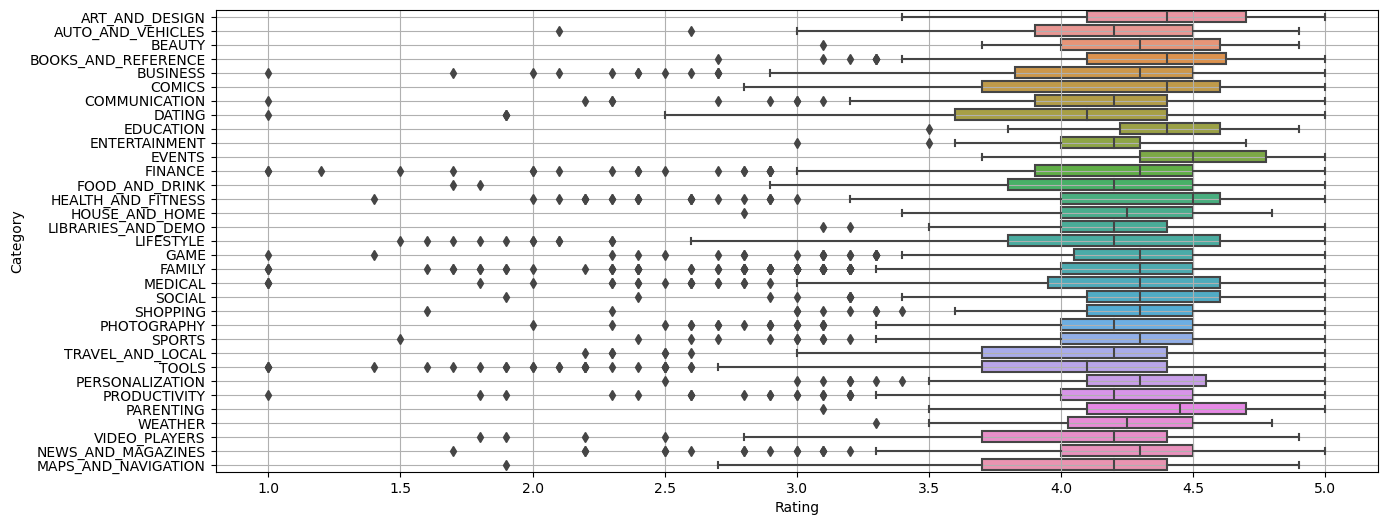

In [54]:
plt.figure(figsize=(15,6))
sns.boxplot(x="Rating", y="Category", data=df)
plt.grid()

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,7307.0,4.162899e+00,5.552763e-01,1.0,4.0,4.3,4.5,5.00
Reviews,7307.0,5.091109e+04,1.457407e+05,1.0,91.0,1749.0,27558.5,1736105.00
Size,7307.0,2.168780e+04,2.246097e+04,8.5,5000.0,14000.0,30000.0,100000.00
Installs,7307.0,1.716009e+06,3.205978e+06,5.0,10000.0,100000.0,1000000.0,10000000.00
Price,7307.0,3.887382e-01,2.409159e+00,0.0,0.0,0.0,0.0,79.99


In [56]:
inp1 = df.copy().reset_index()

In [57]:
# Apply log transformation to 'Reviews','Installs','Size' column

inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])
inp1['Size'] = np.log1p(inp1['Size'])

In [58]:
# Drop the specified columns
inp1.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver','index'], axis=1, inplace=True)

In [59]:
inp2 = inp1.copy()

# Get dummy columns for Category, Genres, and Content Rating
inp2 = pd.get_dummies(inp2, columns=['Category', 'Genres', 'Content Rating','Type'],drop_first=True)

In [60]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Genres_Action;Action & Adventure,Genres_Adventure,Genres_Adventure;Action & Adventure,Genres_Adventure;Brain Games,Genres_Adventure;Education,Genres_Arcade,Genres_Arcade;Action & Adventure,Genres_Arcade;Pretend Play,Genres_Art & Design,Genres_Art & Design;Creativity,Genres_Art & Design;Pretend Play,Genres_Auto & Vehicles,Genres_Beauty,Genres_Board,Genres_Board;Action & Adventure,Genres_Board;Brain Games,Genres_Board;Pretend Play,Genres_Books & Reference,Genres_Books & Reference;Education,Genres_Business,Genres_Card,Genres_Card;Action & Adventure,Genres_Card;Brain Games,Genres_Casino,Genres_Casual,Genres_Casual;Action & Adventure,Genres_Casual;Brain Games,Genres_Casual;Creativity,Genres_Casual;Education,Genres_Casual;Music & Video,Genres_Casual;Pretend Play,Genres_Comics,Genres_Comics;Creativity,Genres_Communication,Genres_Dating,Genres_Education,Genres_Education;Action & Adventure,Genres_Education;Brain Games,Genres_Education;Creativity,Genres_Education;Education,Genres_Education;Music & Video,Genres_Education;Pretend Play,Genres_Educational,Genres_Educational;Action & Adventure,Genres_Educational;Brain Games,Genres_Educational;Creativity,Genres_Educational;Education,Genres_Educational;Pretend Play,Genres_Entertainment,Genres_Entertainment;Action & Adventure,Genres_Entertainment;Brain Games,Genres_Entertainment;Creativity,Genres_Entertainment;Education,Genres_Entertainment;Music & Video,Genres_Entertainment;Pretend Play,Genres_Events,Genres_Finance,Genres_Food & Drink,Genres_Health & Fitness,Genres_Health & Fitness;Action & Adventure,Genres_Health & Fitness;Education,Genres_House & Home,Genres_Libraries & Demo,Genres_Lifestyle,Genres_Lifestyle;Pretend Play,Genres_Maps & Navigation,Genres_Medical,Genres_Music,Genres_Music & Audio;Music & Video,Genres_Music;Music & Video,Genres_News & Magazines,Genres_Parenting,Genres_Parenting;Brain Games,Genres_Parenting;Education,Genres_Parenting;Music & Video,Genres_Personalization,Genres_Photography,Genres_Productivity,Genres_Puzzle,Genres_Puzzle;Action & Adventure,Genres_Puzzle;Brain Games,Genres_Puzzle;Creativity,Genres_Puzzle;Education,Genres_Racing,Genres_Racing;Action & Adventure,Genres_Racing;Pretend Play,Genres_Role Playing,Genres_Role Playing;Action & Adventure,Genres_Role Playing;Brain Games,Genres_Role Playing;Pretend Play,Genres_Shopping,Genres_Simulation,Genres_Simulation;Action & Adventure,Genres_Simulation;Education,Genres_Simulation;Pretend Play,Genres_Social,Genres_Sports,Genres_Sports;Action & Adventure,Genres_Strategy,Genres_Strategy;Action & Adventure,Genres_Strategy;Creativity,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Paid
0,4.1,5.075174,9.852247,9.210440,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [61]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 32)


print("Train set shape: ", df_train.shape)
print("Test set shape: ", df_test.shape)

Train set shape:  (5114, 154)
Test set shape:  (2193, 154)


In [62]:
# 10. Separate the dataframes into X_train, y_train, X_test, and y_test.
y_train = df_train.Rating
X_train = df_train.drop(['Rating'], axis=1)

y_test = df_test.Rating
X_test = df_test.drop(['Rating'], axis=1)

In [63]:
# 11.1 Model building
# Use linear regression as the technique

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.15559171269437966

In [64]:
# 11.2 
# Report the R2 on the train set
from sklearn.metrics import r2_score
y_train_pred= lr.predict(X_train)
a=r2_score(y_train, y_train_pred)
a=a*100
print("R2 Score:"+"{:.2f}%".format(a))

R2 Score:15.56%


In [65]:
y_test_pred= lr.predict(X_test)
b=r2_score(y_test, y_test_pred)
b=b*100
print("R2 Score:"+"{:.2f}%".format(b))

R2 Score:13.00%
